In [2]:
import os
os.getcwd()



'c:\\Users\\HEMANTH S K\\OneDrive\\Desktop\\Cognitive_skills\\notebook'

First 5 rows of the dataset:


,student_id,name,class,comprehension,attention,focus,retention,assessment_score,engagement_time
0,1,Alice,10A,80,70,75,85,88,120
1,2,Bob,10B,65,60,70,68,72,90
2,3,Charlie,10C,78,80,82,77,85,110
3,4,David,10A,55,60,58,60,65,70
4,5,Eva,10B,92,88,90,95,98,150



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   student_id        20 non-null     int64 
 1   name              20 non-null     object
 2   class             20 non-null     object
 3   comprehension     20 non-null     int64 
 4   attention         20 non-null     int64 
 5   focus             20 non-null     int64 
 6   retention         20 non-null     int64 
 7   assessment_score  20 non-null     int64 
 8   engagement_time   20 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 1.5+ KB
None

Descriptive Statistics:


,student_id,comprehension,attention,focus,retention,assessment_score,engagement_time
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,73.000000,70.950000,73.150000,75.400000,79.550000,107.500000
std,5.91608,13.138934,11.820923,12.679345,13.264119,12.326587,29.177316
min,1.00000,50.000000,48.000000,52.000000,55.000000,60.000000,60.000000
25%,5.75000,61.500000,60.000000,60.000000,63.500000,69.500000,83.750000
50%,10.50000,76.000000,71.000000,74.500000,76.500000,81.000000,107.500000
75%,15.25000,83.500000,80.000000,83.500000,87.250000,90.250000,131.250000
max,20.00000,92.000000,88.000000,92.000000,95.000000,98.000000,155.000000



Correlation Matrix:


,comprehension,attention,focus,retention,assessment_score
comprehension,1.000000,0.960362,0.974641,0.991468,0.993109
attention,0.960362,1.000000,0.955544,0.939683,0.951609
focus,0.974641,0.955544,1.000000,0.968509,0.974670
retention,0.991468,0.939683,0.968509,1.000000,0.995839
assessment_score,0.993109,0.951609,0.974670,0.995839,1.000000


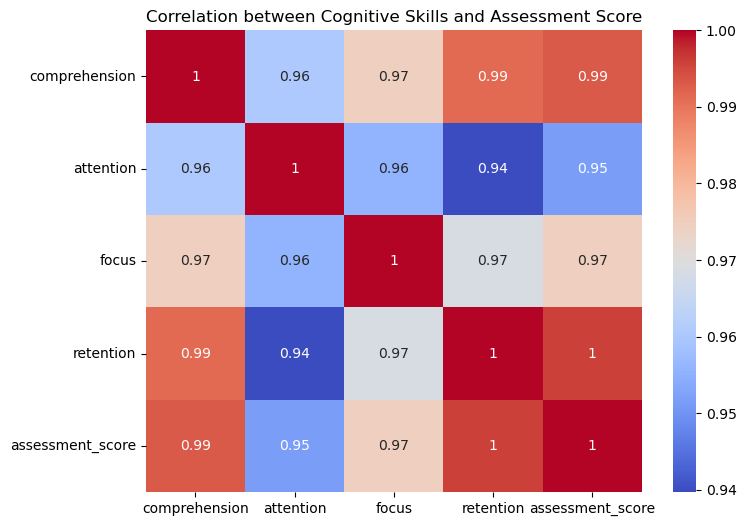


Linear Regression MSE: 1.84
Linear Regression R2 Score: 0.98


c:\Users\HEMANTH S K\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HEMANTH S K\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Student Clusters (Learning Personas):


,student_id,name,learning_persona
0,1,Alice,2
1,2,Bob,2
2,3,Charlie,1
3,4,David,0
4,5,Eva,1
5,6,Frank,2
6,7,Grace,1
7,8,Henry,0
8,9,Isla,2
9,10,Jack,0


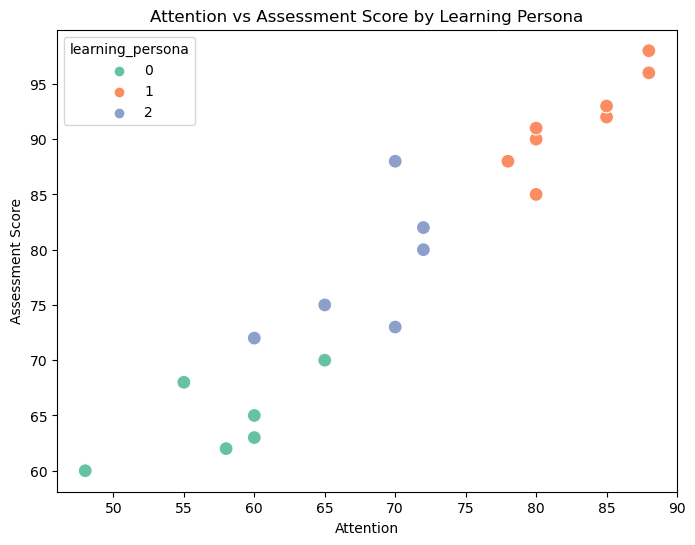

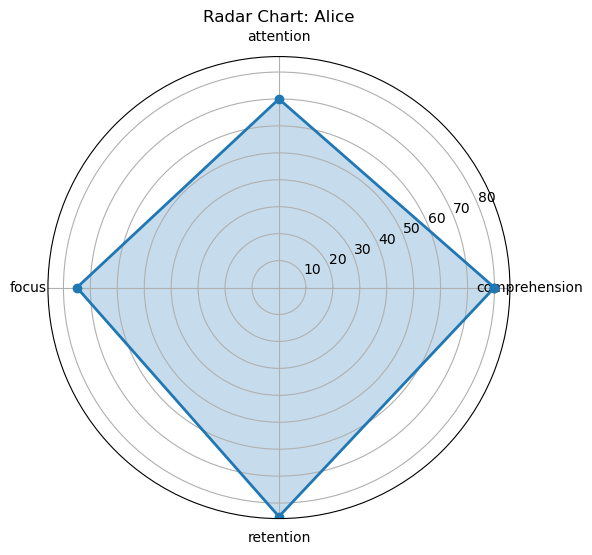

In [9]:
# --- Imports ---
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- Load JSON dataset ---
file_path = "../data/students.json"  # JSON file relative to notebook
with open(file_path, "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)
print("First 5 rows of the dataset:")
display(df.head())

# --- Basic Stats ---
print("\nDataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
display(df.describe())

# --- Correlation Analysis ---
cognitive_columns = ["comprehension", "attention", "focus", "retention", "assessment_score"]
corr = df[cognitive_columns].corr()
print("\nCorrelation Matrix:")
display(corr)

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation between Cognitive Skills and Assessment Score")
plt.show()

# --- Simple ML Model: Predict assessment_score ---
X = df[["comprehension", "attention", "focus", "retention"]]
y = df["assessment_score"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nLinear Regression MSE: {mse:.2f}")
print(f"Linear Regression R2 Score: {r2:.2f}")

# --- Cluster Students: Learning Personas ---
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['learning_persona'] = kmeans.fit_predict(X_scaled)

print("\nStudent Clusters (Learning Personas):")
display(df[["student_id", "name", "learning_persona"]])

# --- Visualizations ---

# Scatter plot: Attention vs Assessment Score
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["attention"], y=df["assessment_score"],
                hue=df["learning_persona"], palette="Set2", s=100)
plt.title("Attention vs Assessment Score by Learning Persona")
plt.xlabel("Attention")
plt.ylabel("Assessment Score")
plt.show()

# Radar chart: Example student profile
import numpy as np

def plot_radar(student_row):
    labels = ["comprehension", "attention", "focus", "retention"]
    values = student_row[labels].values
    values = np.append(values, values[0])  # close the radar loop
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
    angles = np.append(angles, angles[0])

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, 'o-', linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_thetagrids(angles[:-1] * 180/np.pi, labels)
    ax.set_title(f"Radar Chart: {student_row['name']}")
    plt.show()

# Example: Radar chart for first student
plot_radar(df.iloc[0])
